In [120]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw



In [94]:
def visualize_graph(G):
    # Visualization enhancement
    plt.figure(figsize=(14, 10))
    # Using spring layout; k adjusts the distance between nodes.
    pos = nx.spring_layout(G, k=1, iterations=500)

    # Draw nodes and edges with improved aesthetics
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color="#6BAED6", edgecolors="black", linewidths=1.5)
    nx.draw_networkx_edges(G, pos, edge_color="#CCCCCC")

    # Draw custom labels for better clarity
    # for node, (x, y) in pos.items():
    #     plt.text(x, y, node, fontsize=5, ha='center', va='center')

    plt.title("Model Dependency Network", fontsize=16)
    plt.axis("off")  # Turn off the axis
    plt.tight_layout()
    plt.show()

In [95]:
def degree_distribution(G):
    # Plotting degree distribution
    degrees = [d for n, d in G.degree()]
    plt.hist(degrees, bins=range(1, max(degrees)+2), align='left', rwidth=0.8)
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    plt.show()

    # Finding nodes with top 10 degree
    sorted_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
    print("Nodes with top 10 degrees:")
    for node, degree in sorted_nodes:
        print(f"Node {node} - Degree {degree}")

In [96]:
def is_powerlaw(G):
    degrees = [d for n, d in G.degree()]
    fit = powerlaw.Fit(degrees)
    print(f"Alpha (scaling exponent) = {fit.alpha}")
    print(f"Comparing the fit with other distributions:")
    R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    print(f"Loglikelihood ratio between power-law and exponential: R = {R}, p = {p}")


In [97]:
def clustering_coefficient(G):
    # Compute the clustering coefficient for all nodes
    clustering_coeffs = nx.clustering(G)
    for node, coeff in clustering_coeffs.items():
        print(f"Node {node}: Clustering Coefficient = {coeff:.2f}")

    # Compute the average clustering coefficient
    avg_clustering = nx.average_clustering(G)
    print(f"\nAverage Clustering Coefficient = {avg_clustering:.2f}")

In [98]:
def betweenness(G):
    # Compute the betweenness centrality for all nodes
    betweenness_centrality = nx.betweenness_centrality(G)

    # Sort nodes by betweenness centrality and get the top 5
    sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

    print("Top 5 nodes with highest Betweenness Centrality:")
    for node, centrality in sorted_betweenness:
        print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")

# Model to Model Networks

1. sees to be a power-law distribution -> suggest the growth machenism
2. the top 5 popular models: t5-small, bigcode/santacoder, t5-base, Salesforce/codet5-base, bigcode/starcoder
3. Top 5 nodes with highest Betweenness Centrality: t5-base, t5-small, Salesforce/codet5-base, SEBIS/code_trans_t5_base_transfer_learning_pretrain, t5-large
4. clustering value is 0, meaning no clustering.



In [176]:

model_to_model_file_path = 'data/model_dependency.csv'

# Create a directed graph
M_Graph = nx.Graph()

# Read the CSV file
with open(model_to_model_file_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Extract headers
    headers = next(csv_reader)
    print(f"Headers: {headers}\n")
    
    # Process each row
    for row in csv_reader:
        if row[3] != '2':
            # not a code model
            continue
        model_name = row[0]
        parent_name = row[1]
        if len(parent_name) == 0:
            parent_name = model_name


        # Add nodes and edges to the graph
        M_Graph.add_node(model_name)
        M_Graph.add_node(parent_name)
        M_Graph.add_edge(parent_name, model_name)

Headers: ['Model Name', 'Parent_Model', 'Type', 'Is code model', 'plausible', '']



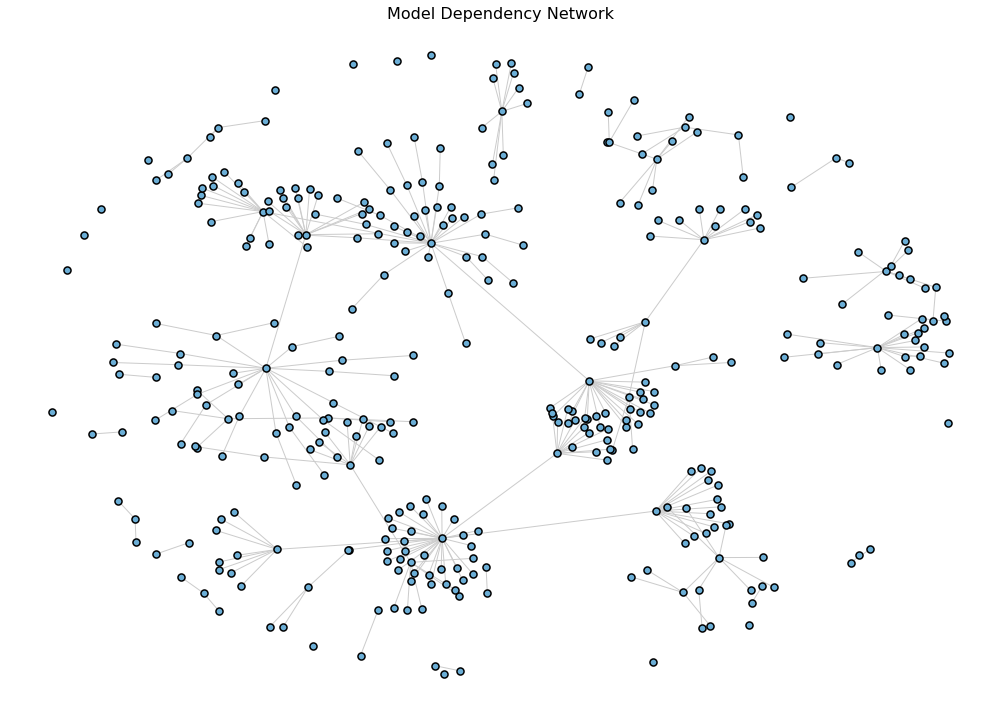

In [177]:
visualize_graph(M_Graph)

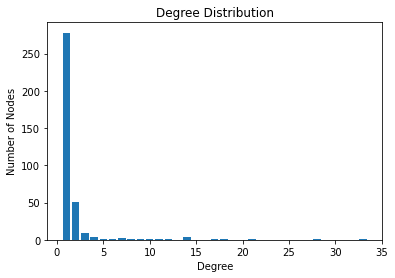

Nodes with top 10 degrees:
Node t5-small - Degree 33
Node t5-base - Degree 28
Node Salesforce/codet5-base - Degree 21
Node bigcode/starcoder - Degree 18
Node t5-large - Degree 17
Node SEBIS/code_trans_t5_base_transfer_learning_pretrain - Degree 14
Node SEBIS/code_trans_t5_large_transfer_learning_pretrain - Degree 14
Node SEBIS/code_trans_t5_small_api_generation_multitask - Degree 14
Node SEBIS/code_trans_t5_small_transfer_learning_pretrain - Degree 14
Node bigcode/santacoder - Degree 12


In [178]:
degree_distribution(M_Graph)

In [181]:
is_powerlaw(M_Graph)

Calculating best minimal value for power law fit
Alpha (scaling exponent) = 3.0695153622239664
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 6.363315517730658, p = 1.9744450899355296e-10


In [182]:
betweenness(M_Graph)

Top 5 nodes with highest Betweenness Centrality:
Node t5-base: Betweenness Centrality = 0.0386
Node t5-small: Betweenness Centrality = 0.0308
Node Salesforce/codet5-base: Betweenness Centrality = 0.0219
Node SEBIS/code_trans_t5_base_transfer_learning_pretrain: Betweenness Centrality = 0.0139
Node t5-large: Betweenness Centrality = 0.0137
Node SEBIS/code_trans_t5_small_api_generation_multitask: Betweenness Centrality = 0.0121
Node SEBIS/code_trans_t5_small_transfer_learning_pretrain: Betweenness Centrality = 0.0121
Node Salesforce/codet5-small: Betweenness Centrality = 0.0077
Node SEBIS/code_trans_t5_large_transfer_learning_pretrain: Betweenness Centrality = 0.0076
Node Salesforce/codet5-base-multi-sum: Betweenness Centrality = 0.0023


# Data-to-Data network

In [183]:

data_to_data_file_path = 'data/data-data_dependency.csv'

# Create a directed graph
D_Graph = nx.Graph()

# Read the CSV file
with open(data_to_data_file_path, mode='r', encoding='ISO-8859-1') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Extract headers
    headers = next(csv_reader)
    print(f"Headers: {headers}\n")
    
    # Process each row
    for row in csv_reader:
        model_name = row[0]
        parent_name = row[1]
        if len(parent_name) == 0:
            parent_name = model_name


        # Add nodes and edges to the graph
        D_Graph.add_node(model_name)
        D_Graph.add_node(parent_name)
        D_Graph.add_edge(parent_name, model_name)

Headers: ['model1', 'model2', 'description', '', '', '']



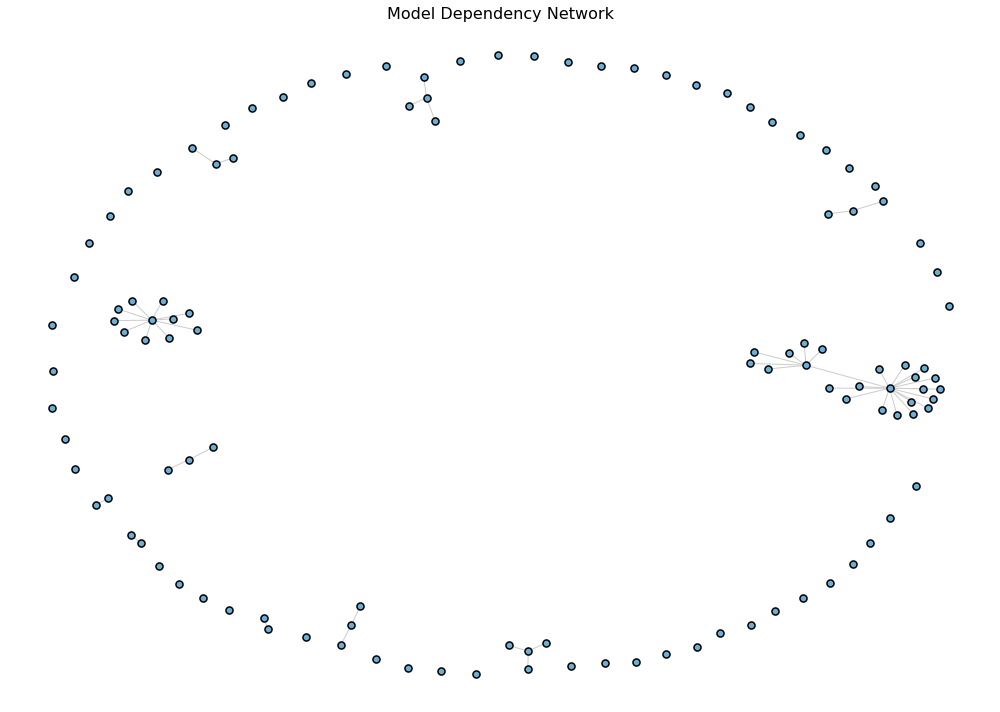

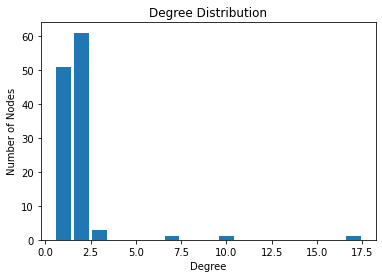

Nodes with top 10 degrees:
Node codexglue - Degree 17
Node codealpaca - Degree 10
Node code_x_glue_ct_code_to_text - Degree 7
Node the Pile - Degree 3
Node codeparrot/codeparrot-clean - Degree 3
Node irds/codesearchnet - Degree 3
Node yahma/alpaca-cleaned - Degree 2
Node commitgen - Degree 2
Node bigcode/the-stack - Degree 2
Node codeparrot/github-code - Degree 2


In [184]:
visualize_graph(D_Graph)
degree_distribution(D_Graph)

In [185]:
is_powerlaw(D_Graph)

Calculating best minimal value for power law fit
Alpha (scaling exponent) = 11.774021168392364
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 5.782624526285176, p = 7.35440906211823e-09


In [186]:
clustering_coefficient(D_Graph)

Node yahma/alpaca-cleaned: Clustering Coefficient = 0.00
Node codealpaca: Clustering Coefficient = 0.00
Node pszemraj/fleece2instructions-codealpaca: Clustering Coefficient = 0.00
Node sahil2801/CodeAlpaca-20k: Clustering Coefficient = 0.00
Node HuggingFaceH4/testing_codealpaca_small: Clustering Coefficient = 0.00
Node HuggingFaceH4/CodeAlpaca_20K: Clustering Coefficient = 0.00
Node ewof/code-alpaca-instruct-unfiltered: Clustering Coefficient = 0.00
Node Abzu/CodeAlpacaPython: Clustering Coefficient = 0.00
Node lucasmccabe-lmi/CodeAlpaca-20k: Clustering Coefficient = 0.00
Node sixeightw0lf/codealpaca20k: Clustering Coefficient = 0.00
Node thisisanshgupta/CodeAlpaca: Clustering Coefficient = 0.00
Node thisisanshgupta/CodeAlpacaSmall: Clustering Coefficient = 0.00
Node the Pile: Clustering Coefficient = 0.00
Node andstor/the_pile_github: Clustering Coefficient = 0.00
Node commitgen: Clustering Coefficient = 0.00
Node bigcode/the-stack: Clustering Coefficient = 0.00
Node bigcode/the-stack

In [187]:
betweenness(D_Graph)

Top 5 nodes with highest Betweenness Centrality:
Node codexglue: Betweenness Centrality = 0.0342
Node code_x_glue_ct_code_to_text: Betweenness Centrality = 0.0172
Node codealpaca: Betweenness Centrality = 0.0066
Node codeparrot/codeparrot-clean: Betweenness Centrality = 0.0004
Node irds/codesearchnet: Betweenness Centrality = 0.0004
Node bigcode/the-stack: Betweenness Centrality = 0.0001
Node codeparrot/github-code: Betweenness Centrality = 0.0001
Node codeparrot/github-jupyter-text-code-pairs: Betweenness Centrality = 0.0001
Node codeparrot/xlcost-text-to-code: Betweenness Centrality = 0.0001
Node yahma/alpaca-cleaned: Betweenness Centrality = 0.0000


# Model-Data Dependency

In [174]:

model_to_model_file_path = 'data/model_data_dependency.csv'

# Create a directed graph
MD_Graph = nx.Graph()

# Read the CSV file
with open(model_to_model_file_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    
    # Process each row
    for row in csv_reader:
        if row[2] != '2':
            # not a code model
            continue
        model_name = row[0]
        parent_name = row[1]
        if len(parent_name) == 0:
            parent_name = model_name


        # Add nodes and edges to the graph
        MD_Graph.add_node(model_name)
        MD_Graph.add_node(parent_name)
        MD_Graph.add_edge(parent_name, model_name)

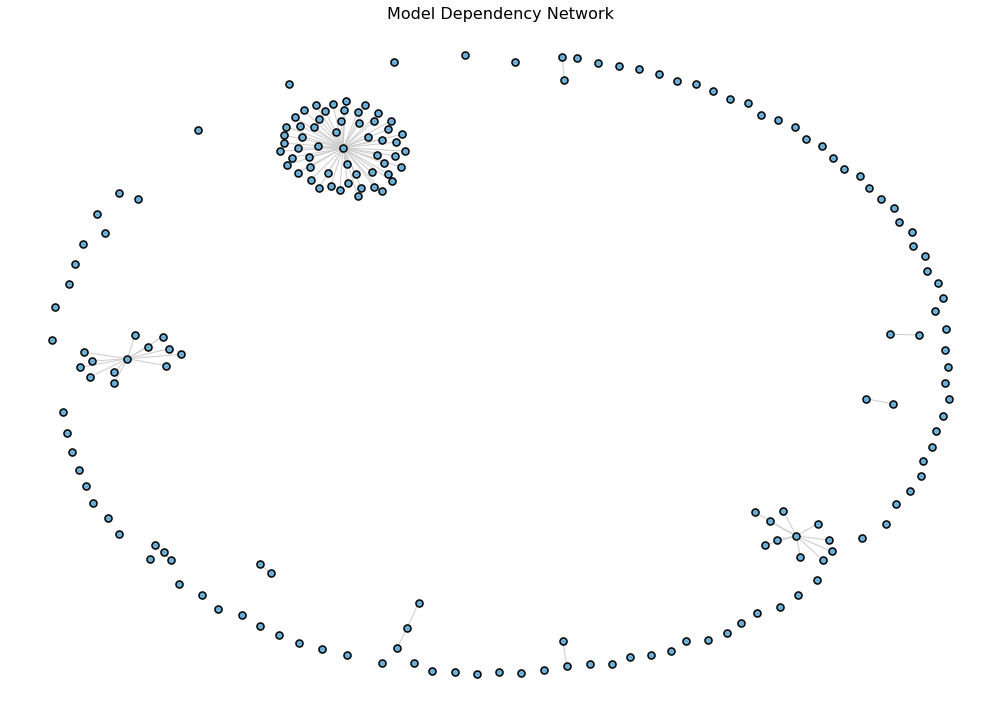

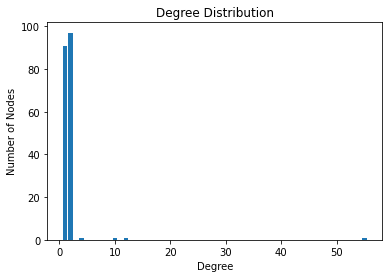

Nodes with top 10 degrees:
Node SEBIS - Degree 55
Node external-dataset - Degree 12
Node code_search_net - Degree 10
Node transformersbook/codeparrot - Degree 4
Node SEBIS/code_trans_t5_large_api_generation_transfer_learning_finetune - Degree 2
Node SEBIS/code_trans_t5_large_code_comment_generation_java_multitask - Degree 2
Node SEBIS/code_trans_t5_large_code_comment_generation_java_multitask_finetune - Degree 2
Node SEBIS/code_trans_t5_large_code_comment_generation_java_transfer_learning_finetune - Degree 2
Node SEBIS/code_trans_t5_large_code_documentation_generation_go_multitask - Degree 2
Node SEBIS/code_trans_t5_large_code_documentation_generation_go_multitask_finetune - Degree 2
Calculating best minimal value for power law fit
Alpha (scaling exponent) = 14.632932885682262
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 4.90902906206237, p = 9.152841508283517e-07
Node SEBIS/code_trans_t5_base_api_generation: Clustering Coeffici

In [192]:
visualize_graph(MD_Graph)
degree_distribution(MD_Graph)
is_powerlaw(MD_Graph)
clustering_coefficient(MD_Graph)
betweenness(MD_Graph)

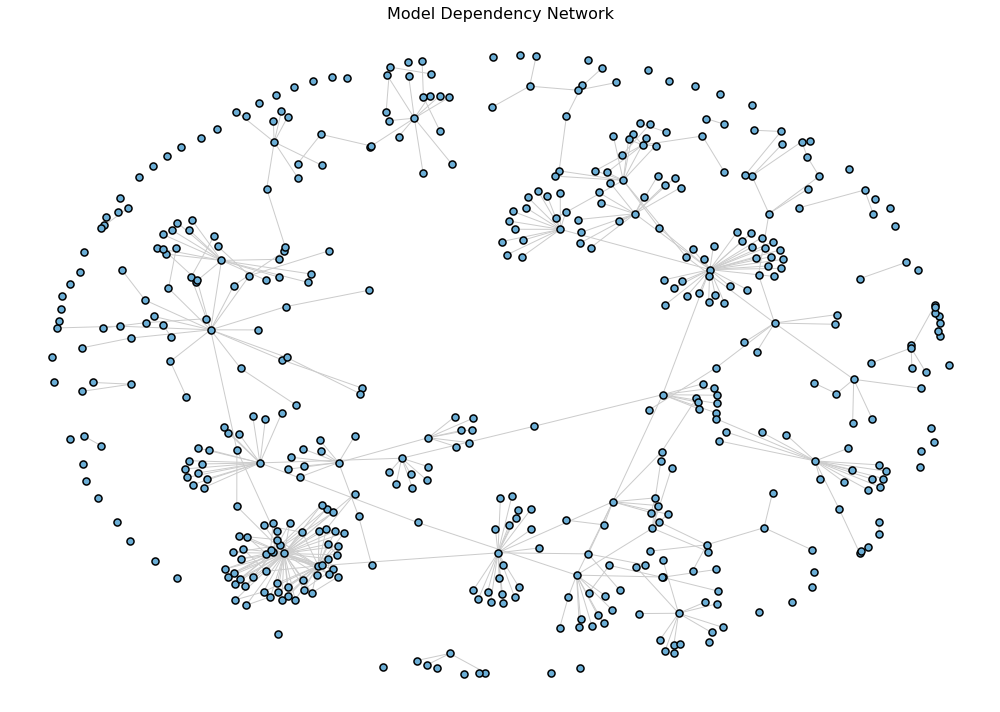

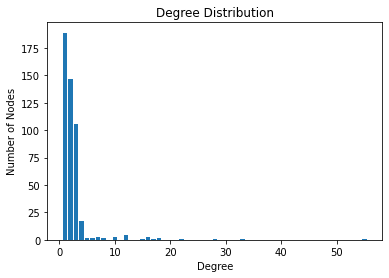

Nodes with top 10 degrees:
Node SEBIS - Degree 55
Node t5-small - Degree 33
Node t5-base - Degree 28
Node Salesforce/codet5-base - Degree 22
Node bigcode/starcoder - Degree 18
Node codexglue - Degree 18
Node t5-large - Degree 17
Node SEBIS/code_trans_t5_large_transfer_learning_pretrain - Degree 16
Node SEBIS/code_trans_t5_small_api_generation_multitask - Degree 16
Node SEBIS/code_trans_t5_small_transfer_learning_pretrain - Degree 16
Calculating best minimal value for power law fit
Alpha (scaling exponent) = 4.534292035936407
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 6.904745775750447, p = 5.029341265603616e-12
Node 8bit-coder/alpaca-7b-nativeEnhanced: Clustering Coefficient = 0.00
Node chavinlo/alpaca-native: Clustering Coefficient = 0.00
Node abacaj/codegen-16B-nl-sharded: Clustering Coefficient = 0.00
Node Salesforce/codegen-16B-nl: Clustering Coefficient = 0.00
Node abhi11nav/codebert-gpt2-commitgen: Clustering Coefficient

In [191]:
U_Graph = nx.compose(M_Graph, D_Graph)
U_Graph = nx.compose(U_Graph, MD_Graph)
visualize_graph(U_Graph)
degree_distribution(U_Graph)
is_powerlaw(U_Graph)
clustering_coefficient(U_Graph)
betweenness(U_Graph)

# Author network

In [114]:
A_network = nx.Graph()

for node in U_Graph.nodes():
    try:
        owner, asset = node.split('/')
    except ValueError:
        continue
        owner, asset = 'HF', node
    A_network.add_edge(owner, asset)


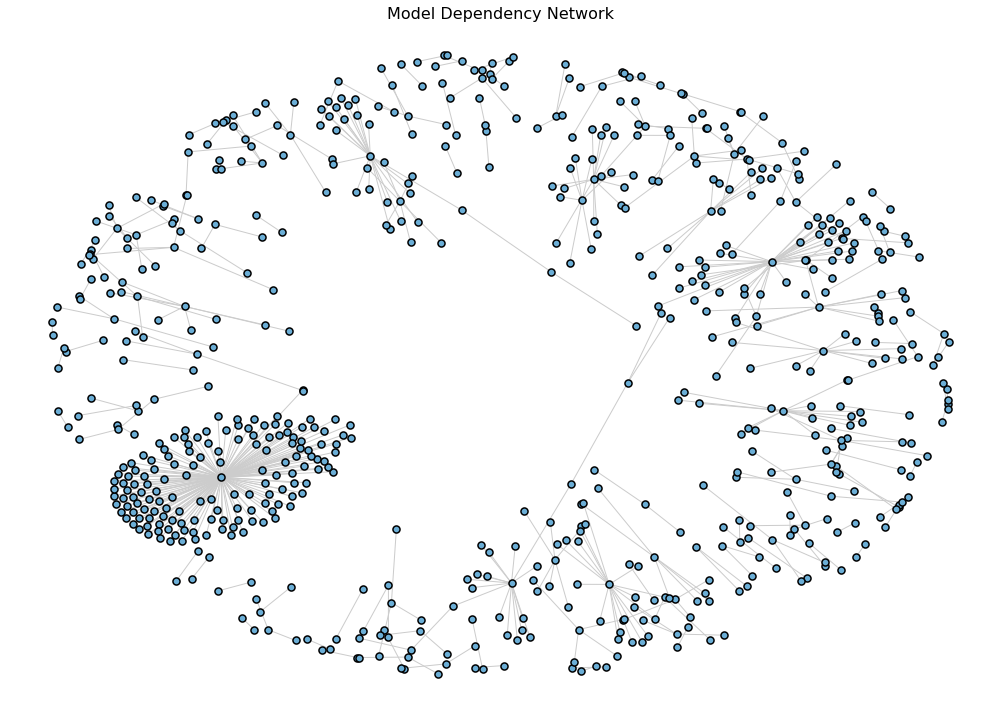

In [115]:
visualize_graph(A_network)

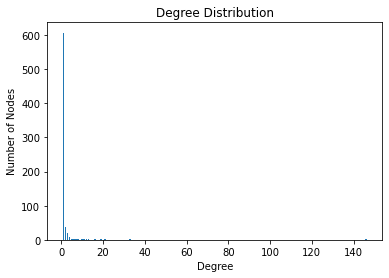

Nodes with top 10 degrees:
Node SEBIS - Degree 146
Node Salesforce - Degree 33
Node mrm8488 - Degree 21
Node codeparrot - Degree 19
Node codeSpaghetti - Degree 16
Node Nan-Do - Degree 13
Node bigcode - Degree 12
Node coderSounak - Degree 11
Node kejian - Degree 10
Node sagorsarker - Degree 8


In [116]:
degree_distribution(A_network)

In [117]:
is_powerlaw(A_network)

Calculating best minimal value for power law fit
Alpha (scaling exponent) = 2.9187908229846977
Comparing the fit with other distributions:
Loglikelihood ratio between power-law and exponential: R = 2.7098764729591136, p = 0.006730827059587025


In [118]:
clustering_coefficient(A_network)

Node AkshatSurolia: Clustering Coefficient = 0.00
Node ICD-10-Code-Prediction: Clustering Coefficient = 0.00
Node 8bit-coder: Clustering Coefficient = 0.00
Node alpaca-7b-nativeEnhanced: Clustering Coefficient = 0.00
Node chavinlo: Clustering Coefficient = 0.00
Node alpaca-native: Clustering Coefficient = 0.00
Node abacaj: Clustering Coefficient = 0.00
Node codegen-16B-nl-sharded: Clustering Coefficient = 0.00
Node Salesforce: Clustering Coefficient = 0.00
Node codegen-16B-nl: Clustering Coefficient = 0.00
Node abhi11nav: Clustering Coefficient = 0.00
Node codebert-gpt2-commitgen: Clustering Coefficient = 0.00
Node microsoft: Clustering Coefficient = 0.00
Node codebert-base: Clustering Coefficient = 0.00
Node coderbert-mlm: Clustering Coefficient = 0.00
Node codebert-base-mlm: Clustering Coefficient = 0.00
Node alecsharpie: Clustering Coefficient = 0.00
Node codegen_350m_css: Clustering Coefficient = 0.00
Node codegen-350M-multi: Clustering Coefficient = 0.00
Node codegen_350m_html: Cl

In [119]:
betweenness(A_network)

Top 5 nodes with highest Betweenness Centrality:
Node SEBIS: Betweenness Centrality = 0.0448
Node Salesforce: Betweenness Centrality = 0.0028
Node mrm8488: Betweenness Centrality = 0.0011
Node codeSpaghetti: Betweenness Centrality = 0.0009
Node codeparrot: Betweenness Centrality = 0.0006
Node Nan-Do: Betweenness Centrality = 0.0003
Node bigcode: Betweenness Centrality = 0.0003
Node coderSounak: Betweenness Centrality = 0.0002
Node q-FrozenLake-v1-4x4-noSlippery: Betweenness Centrality = 0.0002
Node codegen-350M-multi: Betweenness Centrality = 0.0002


# Metrics Analysis

要计算:

- number of downloads
- number of likes
- model types, type distribution
- model tags, tag distribution
- sizes. download是不准的，得看目录下model的size. 手动标记一下就行了.

In [160]:
from huggingface_api import HuggingFaceAPI
import yaml
with open('config.yaml') as f:
    config = yaml.load(f)

api_key = config['huggingface_key']
hf_api = HuggingFaceAPI(api_key)

<ipython-input-160-e007795ebc0c>:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


In [125]:
# get model information


model_to_model_file_path = 'data/model_dependency.csv'

model_set = set()

# Read the CSV file
with open(model_to_model_file_path, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Extract headers
    headers = next(csv_reader)
    # Process each row
    for row in csv_reader:
        if row[3] == '0':
            # not a code model
            continue
        model_name = row[0]
        model_set.add(model_name)

len(model_set)

449

In [165]:
import json

# information path 
model_info_path = 'data/model_detail_dict_.json'

# Open and read the file
with open(model_info_path, 'r') as file:
    model_info = json.load(file)

# List to store likes for each model
likes_dict = {}
downloads_dict = {}

tag_count = {}

for model in model_set:
    try:
        info = model_info[model]
    except KeyError:
        print(f"Model {model} not found")
        info = hf_api.get_model_info_by_id(model)
        if 'error' in info:
            continue
        print(info)

    likes = info['likes']
    likes_dict[model] = likes

    downloads = info['downloads']
    downloads_dict[model] = downloads

    tags = info['tags']
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

# find the top 10 models with most likes
sorted_likes = sorted(likes_dict.items(), key=lambda item: item[1], reverse=True)[:10]
sorted_downloads = sorted(downloads_dict.items(), key=lambda item: item[1], reverse=True)[:10]
sorted_likes


Model thmk/codegpt-java-10.2 not found
{'_id': '63f0f4ef5b11a9c3ca7196e8', 'id': 'thmk/codegpt-java-10.2', 'modelId': 'thmk/codegpt-java-10.2', 'author': 'thmk', 'sha': '48c924f2164e11ae61781845a4f3be3f38f4a0f6', 'lastModified': '2023-02-18T16:57:59.000Z', 'private': False, 'disabled': False, 'gated': False, 'pipeline_tag': 'text-generation', 'tags': ['transformers', 'pytorch', 'tensorboard', 'gpt2', 'text-generation', 'generated_from_trainer', 'license:mit', 'endpoints_compatible', 'text-generation-inference', 'region:us'], 'downloads': 4, 'library_name': 'transformers', 'widgetData': [{'text': 'My name is Julien and I like to'}, {'text': 'My name is Thomas and my main'}, {'text': 'My name is Mariama, my favorite'}, {'text': 'My name is Clara and I am'}, {'text': 'My name is Lewis and I like to'}, {'text': 'My name is Merve and my favorite'}, {'text': 'My name is Teven and I am'}, {'text': 'Once upon a time,'}], 'likes': 0, 'model-index': [{'name': 'codegpt-java-10.2', 'results': []}]

[('bigcode/starcoder', 2362),
 ('replit/replit-code-v1-3b', 678),
 ('bigcode/santacoder', 298),
 ('microsoft/codebert-base', 133),
 ('Salesforce/codegen-16B-mono', 115),
 ('Salesforce/codegen-16B-multi', 114),
 ('coder119/Vectorartz_Diffusion', 105),
 ('codeparrot/codeparrot', 87),
 ('Salesforce/codet5-base', 80),
 ('GeorgiaTechResearchInstitute/starcoder-gpteacher-code-instruct', 74)]

In [164]:
sorted_downloads

[('Salesforce/codet5-base', 1313648),
 ('microsoft/codebert-base', 852307),
 ('neulab/codebert-java', 164928),
 ('huggingface/CodeBERTa-small-v1', 89145),
 ('sagorsarker/codeswitch-hineng-lid-lince', 81702),
 ('sagorsarker/codeswitch-hineng-pos-lince', 65587),
 ('sagorsarker/codeswitch-hineng-ner-lince', 28047),
 ('huggingface/CodeBERTa-language-id', 22284),
 ('Salesforce/codegen-350M-mono', 22116),
 ('bigcode/starcoder', 19872)]

In [151]:
cmds = ''
for model in model_set:
    cmd = 'git clone https://huggingface.co/' + model + '\n'
    cmds += cmd

with open('git_clone_commands.txt', 'w') as f:
    f.write(cmds)


In [169]:
# sort the tag count
sorted_tag_count = sorted(tag_count.items(), key=lambda item: item[1], reverse=True)
sorted_tag_count

[('region:us', 444),
 ('transformers', 376),
 ('pytorch', 367),
 ('endpoints_compatible', 350),
 ('text-generation-inference', 250),
 ('t5', 192),
 ('jax', 169),
 ('feature-extraction', 152),
 ('summarization', 145),
 ('text-generation', 118),
 ('has_space', 87),
 ('autotrain_compatible', 75),
 ('tensorboard', 68),
 ('generated_from_trainer', 64),
 ('en', 55),
 ('license:apache-2.0', 53),
 ('code', 51),
 ('text2text-generation', 51),
 ('license:bsd-3-clause', 49),
 ('gpt2', 45),
 ('codegen', 43),
 ('text-classification', 37),
 ('model-index', 35),
 ('bert', 33),
 ('custom_code', 29),
 ('safetensors', 26),
 ('roberta', 26),
 ('license:mit', 24),
 ('license:bigcode-openrail-m', 22),
 ('license:openrail', 22),
 ('arxiv:2203.13474', 20),
 ('reinforcement-learning', 19),
 ('dataset:bigcode/the-stack-dedup', 16),
 ('tf', 14),
 ('fill-mask', 14),
 ('arxiv:1911.02150', 13),
 ('arxiv:2207.14255', 13),
 ('deep-reinforcement-learning', 13),
 ('token-classification', 12),
 ('onnx', 12),
 ('gpt_big

Pearson's Correlation Coefficient: 0.5468976330997617


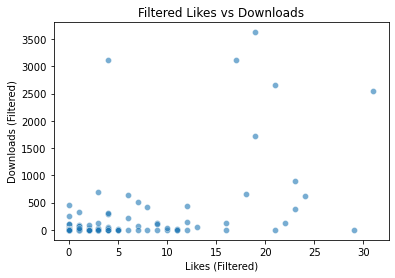

Pearson's Correlation Coefficient: 0.5468976330997624
P-value: 2.804787949895846e-33


In [197]:
import numpy as np
import matplotlib.pyplot as plt

# Get the common models between likes_dict and downloads_dict
common_models = set(likes_dict.keys()).intersection(downloads_dict.keys())

# Extract the likes and downloads for the common models
likes = [likes_dict[model] for model in common_models]
downloads = [downloads_dict[model] for model in common_models]

# Calculate 95th percentile values for likes and downloads
likes_threshold = np.percentile(likes, 95)
downloads_threshold = np.percentile(downloads, 95)

# Filter out the data points above the 95th percentile
filtered_likes = [like for like, download in zip(likes, downloads) if like < likes_threshold and download < downloads_threshold]
filtered_downloads = [download for like, download in zip(likes, downloads) if like < likes_threshold and download < downloads_threshold]

# Compute Pearson's Correlation Coefficient for the filtered data
correlation_coefficient = np.corrcoef(filtered_likes, filtered_downloads)[0, 1]
print("Pearson's Correlation Coefficient:", correlation_coefficient)

# Visualization using Scatter Plot for the filtered data
plt.scatter(filtered_likes, filtered_downloads, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.xlabel('Likes (Filtered)')
plt.ylabel('Downloads (Filtered)')
plt.title('Filtered Likes vs Downloads')
plt.show()

from scipy.stats import pearsonr

# Compute the correlation coefficient and p-value for the filtered data
correlation_coefficient, p_value = pearsonr(filtered_likes, filtered_downloads)

print("Pearson's Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)



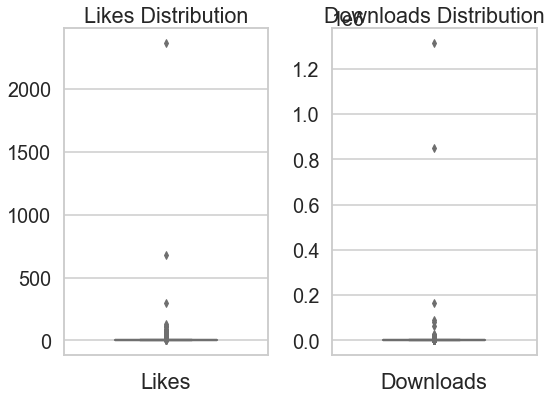

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for professional looking plots
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Setting a font scale and context to make the plot look professional
sns.set_context("talk", font_scale=1.2)

# Create a larger figure
plt.figure(figsize=(8, 6))

# Plotting the box plot for likes with enhanced aesthetics
plt.subplot(1, 2, 1)
sns.boxplot(y=likes, color='skyblue', width=0.5)
plt.title('Likes Distribution')
plt.xlabel('Likes')

# Plotting the box plot for downloads with enhanced aesthetics
plt.subplot(1, 2, 2)
sns.boxplot(y=downloads, color='salmon', width=0.5)
plt.title('Downloads Distribution')
plt.xlabel('Downloads')

# Adjusting space between plots
plt.tight_layout()

# Displaying the plots
plt.show()
